In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Amazon Sales data.csv to Amazon Sales data.csv


In [ ]:
import pandas as pd
import os
import numpy as np

In [ ]:
data=pd.read_csv("Amazon Sales data.csv")

In [ ]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data['Order Date']= pd.to_datetime(data["Order Date"])

In [ ]:
data.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [ ]:
data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [ ]:
data.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date                 object
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

In [ ]:
Total_units_sold = data['Units Sold'].sum()
print(Total_units_sold)

512871


In [ ]:
# Extract month from 'Order Date'
data['Month'] = data['Order Date'].dt.month
# Extract year from 'Order Date'
data['Year'] = data['Order Date'].dt.year
# Extract Year-month from 'Order Date'
data['Year_Month'] = data['Order Date'].dt.to_period('M')
#Monthly Sales Trend
monthly_sales_trend = data.groupby('Month')['Total Revenue'].sum()
print(monthly_sales_trend)

Month
1     10482467.12
2     24740517.77
3      2274823.87
4     16187186.33
5     13215739.99
6      5230325.77
7     15669518.50
8      1128164.91
9      5314762.56
10    15287576.61
11    20568222.76
12     7249462.12
Name: Total Revenue, dtype: float64


In [ ]:
print(monthly_sales_trend.min())
print(monthly_sales_trend.max())

1128164.91
24740517.77


<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Month', ylabel='Total Revenue'>

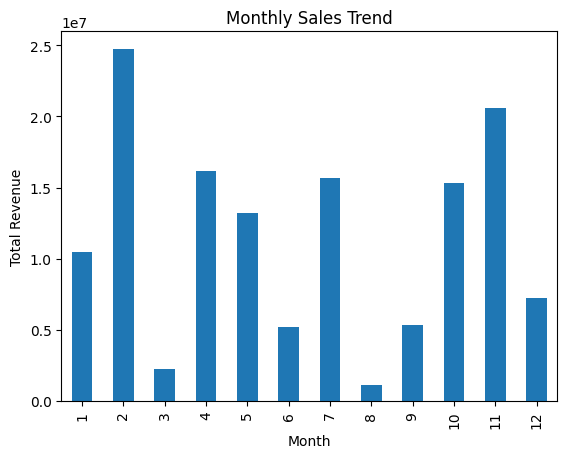

In [ ]:
monthly_sales_trend.plot(kind='bar', xlabel='Month', ylabel='Total Revenue', title='Monthly Sales Trend')

In [ ]:
yearly_sales_trend = data.groupby('Year')['Total Revenue'].sum()
print(yearly_sales_trend.min())
print(yearly_sales_trend.max())


11129166.07
31898644.52


In [ ]:
print(yearly_sales_trend)

Year
2010    19186024.92
2011    11129166.07
2012    31898644.52
2013    20330448.66
2014    16630214.43
2015    12427982.86
2016    12372867.22
2017    13373419.63
Name: Total Revenue, dtype: float64


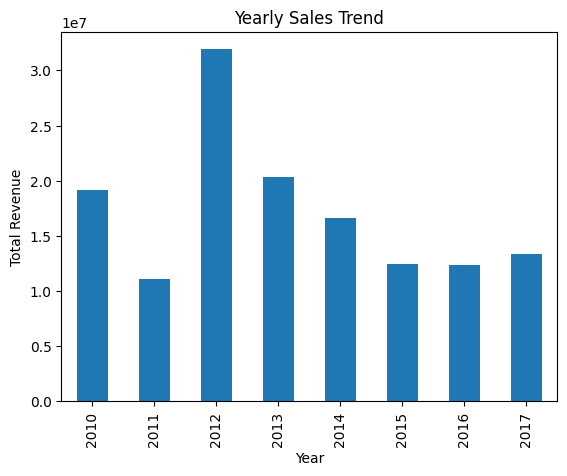

In [ ]:
yearly_sales_trend.plot(kind='bar',xlabel='Year', ylabel='Total Revenue', title='Yearly Sales Trend')
plt.show()

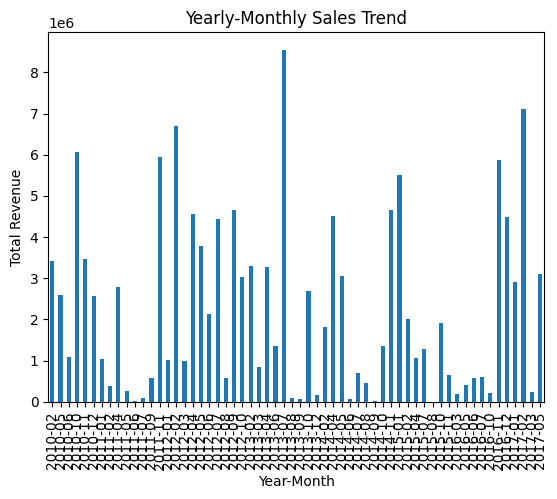

In [ ]:
# Yearly-Monthly Sales Trend
yearly_monthly_sales_trend = data.groupby('Year_Month')['Total Revenue'].sum()
yearly_monthly_sales_trend.plot(kind='bar', xlabel='Year-Month', ylabel='Total Revenue', title='Yearly-Monthly Sales Trend')
plt.show()

<ipython-input-27-de8887e6d8b9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


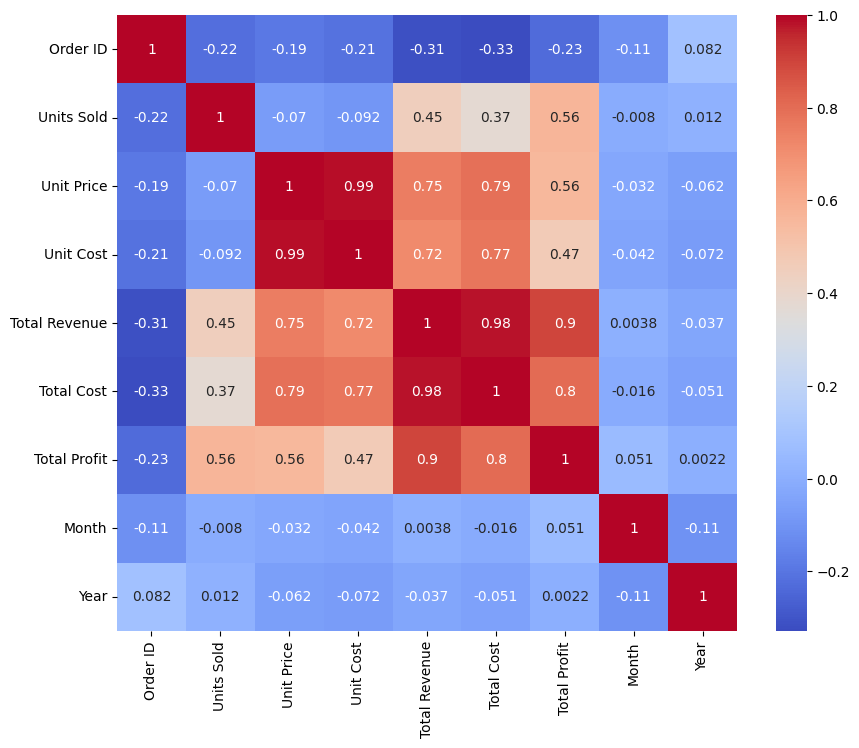

In [ ]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Select highly correlated features
highly_correlated_features = correlation_matrix[abs(correlation_matrix) > 0.7]

# Visualize correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

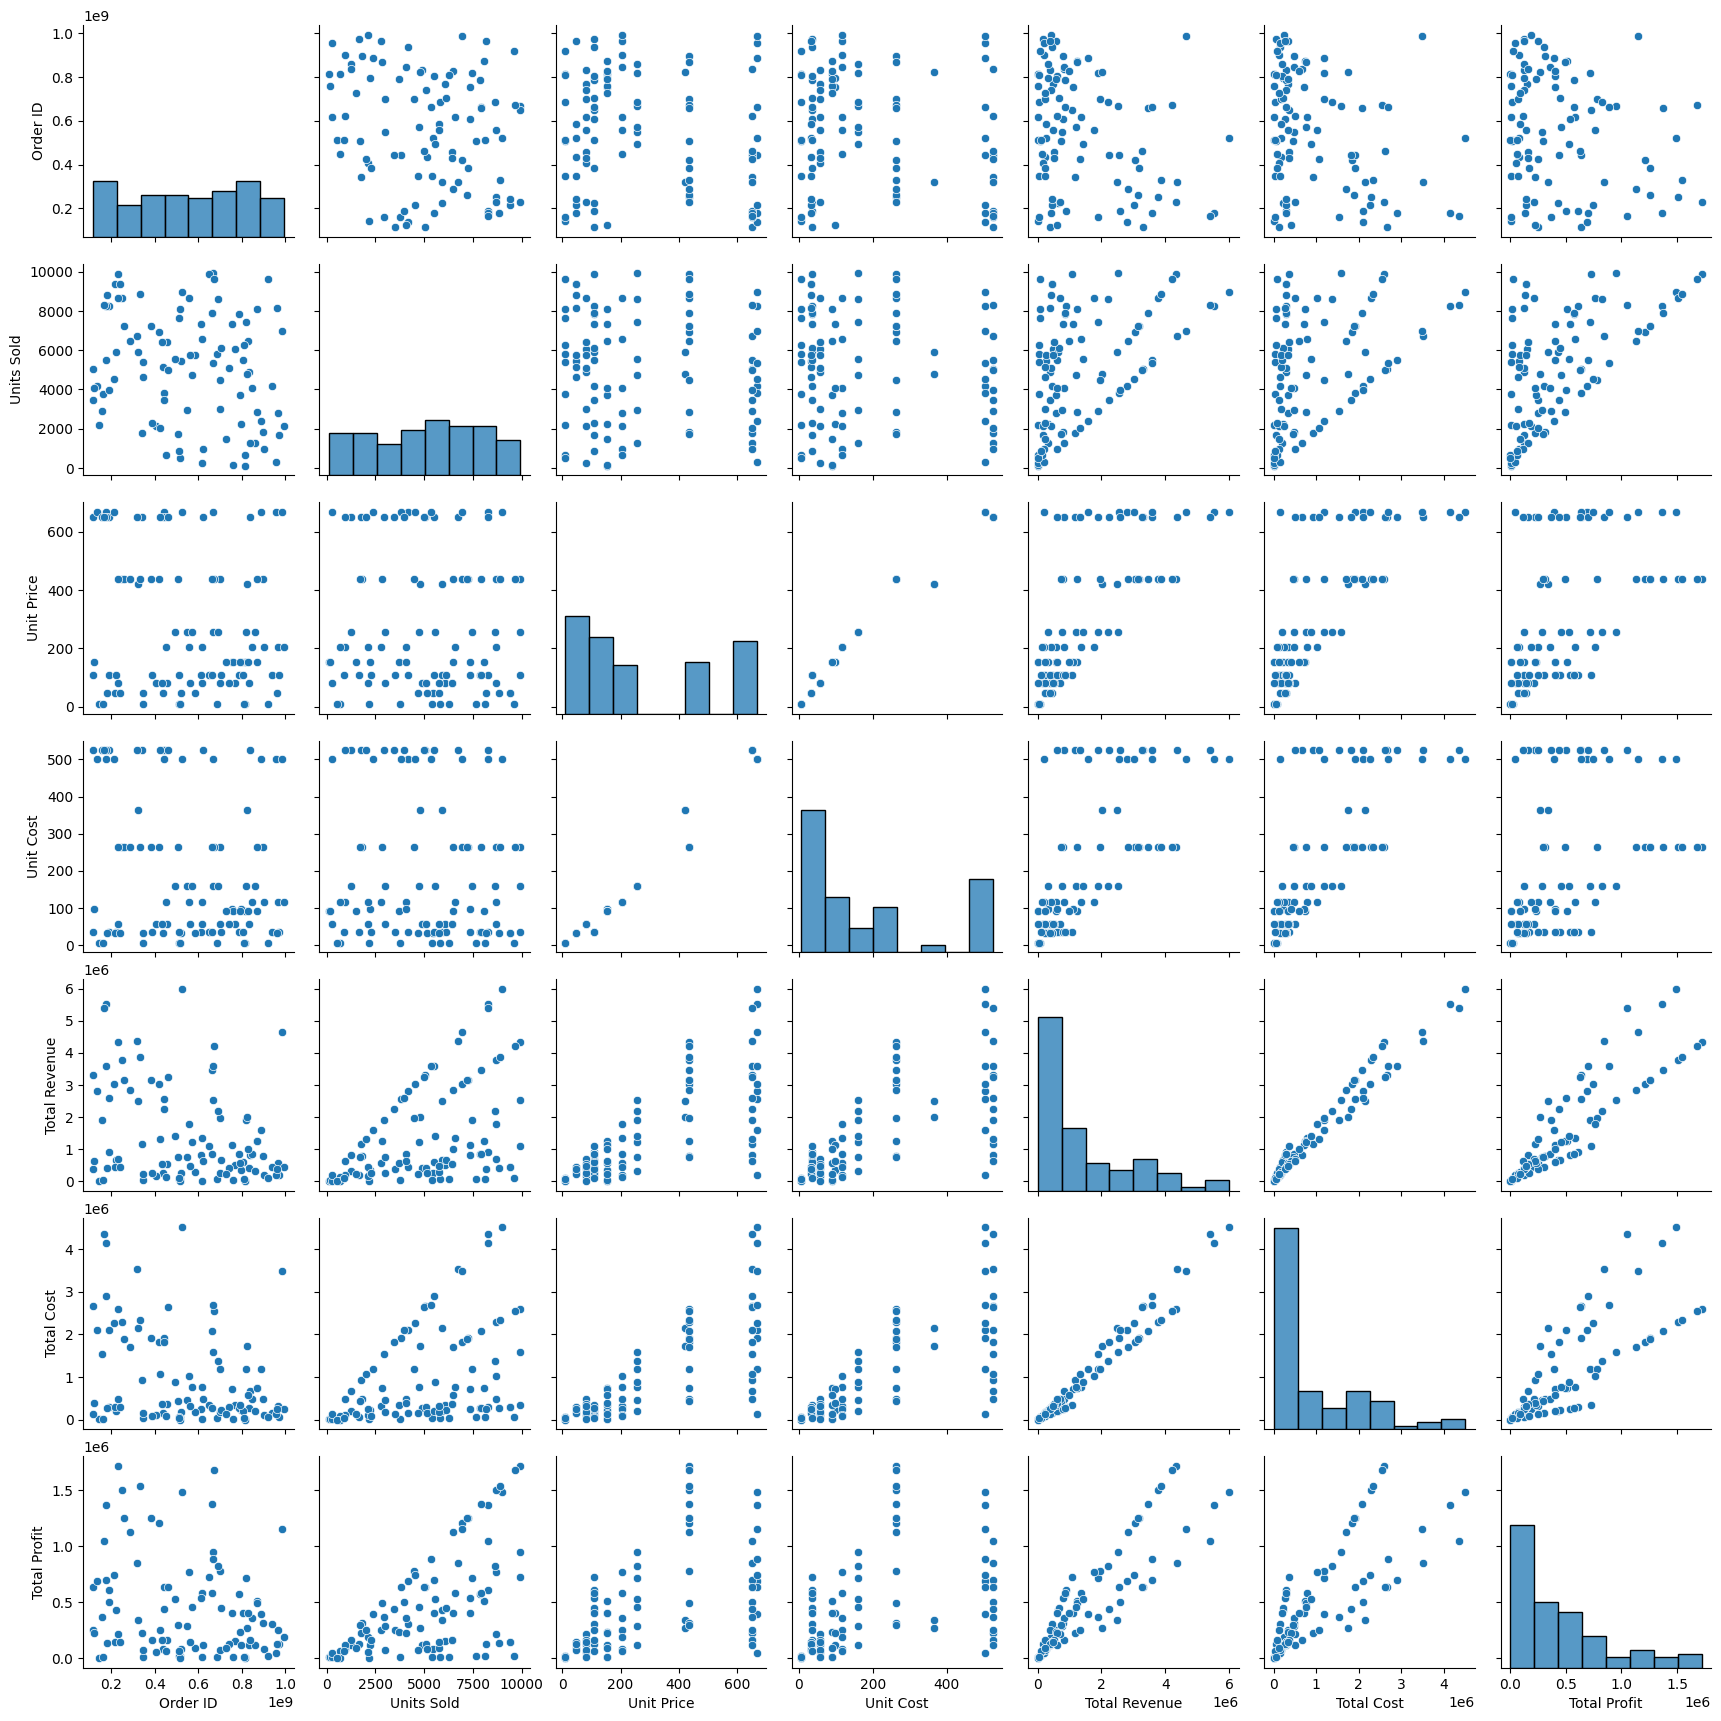

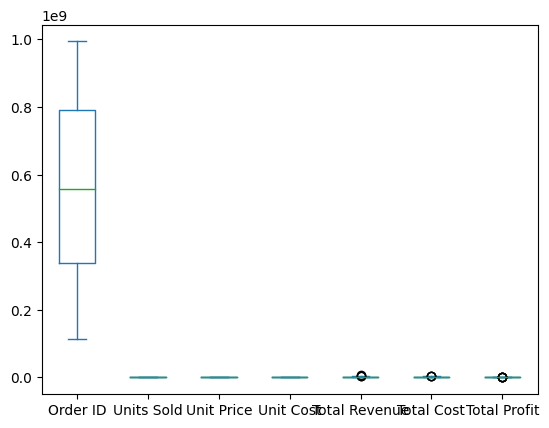

In [ ]:
# Pairwise plot to visualize relationships between attributes
import seaborn as sns

sns.pairplot(data)
plt.show()

# Boxplots to visualize the distribution of each attribute
data.plot(kind='box')
plt.show()